# <u><b>Final Project: Student Loan Dataset</b></u>
## Milestone 4
## By Paulina Mostek
## <u>Objective:</u> Perform data analysis on the National Student Loan Data System dataset using Python.
### Datasets used: https://catalog.data.gov/dataset/national-student-loan-data-system-722b0
* 1617FedSchoolCodeList.xlsx (Federal School Code List) - This may be needed to crossreference school data
* FL_Dashboard_AY_2009_2010_Q1.xls (Q1 of 2009-2010 School Year)
### Files used:
* qaclean.csv (Quarterly Analysis)
* aysclean.csv (Award Year Summary)
* fslclean.csv (Federal School List)
* qacleaning.csv (Previous version of qaclean.csv, needed for further cleaning)
### We will be answering at least 4 of the required questions...
* State the questions in Markdowncells
* Show the answers using python
* Display the results in a plot

# <u>Data Exploration: Questions</u>
### We will be answering at least 4 of these questions and plotting them:
1. Do community colleges or technical colleges originate more loans overall?
2. Which states have the highest total loan disbursements?
3. Do private or public schools disburse more in federal student loans?
4. Do institutions with “college” in the name receive more loans than those with “university”?
5. Are unsubsidized loans more common at private colleges than public ones?
### For relevancy, we will only explore data concerning schools in the US. Foreign schools will be excluded from our analysis.

# <u>Import libraries</u>
## The following libraries will be imported for our code:
* csv: For reading xls files as csv.
* pandas: For loading data into dataframes.
* numpy: For handling arrays.
* matplotlib and seaborns: For plotting data observations.
* statistics: For exploratory analysis and checking basic information of the table.
* xlrd: This library must be installed (pip install xlrd) AND imported to read XLS files.
* re: For using regular expressions (regex) for string manipulation.

In [2]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats
import seaborn as sns
import xlrd
import re

# <u>Import Files</u>
## After running the last few lines of code in the Milestone 3 file, the following files should be located in the same directory:
* qaclean.csv
* aysclean.csv
* fslclean.csv
## We will now import these files into the code

In [3]:
qa = pd.read_csv("qaclean.csv")
ays = pd.read_csv("aysclean.csv")
fsl = pd.read_csv("fslclean.csv")

## <u>Initial exploration:</u>
### We will run a few commands on each dataframe to see what we are working with...
* .describe()
* .dtypes
* .sample(#)
* .head()
* .tail()
* .columns
### These commands will allow us to see if the data requires further cleaning before we can plot the questions.

## <u>Quarterly Analysis (qa)</u>

In [4]:
qa.describe()

,Unnamed: 0,OPE ID,FFEL SUBSIDIZED_Recipients,FFEL SUBSIDIZED_# of Loans Originated,FFEL SUBSIDIZED_$ of Loans Originated,FFEL SUBSIDIZED_# of Disbursements,FFEL SUBSIDIZED_$ of Disbursements,FFEL UNSUBSIDIZED_Recipients,FFEL UNSUBSIDIZED_# of Loans Originated,FFEL UNSUBSIDIZED_$ of Loans Originated,...,FFEL PARENT PLUS_Recipients,FFEL PARENT PLUS_# of Loans Originated,FFEL PARENT PLUS_$ of Loans Originated,FFEL PARENT PLUS_# of Disbursements,FFEL PARENT PLUS_$ of Disbursements,FFEL GRAD PLUS_Recipients,FFEL GRAD PLUS_# of Loans Originated,FFEL GRAD PLUS_$ of Loans Originated,FFEL GRAD PLUS_# of Disbursements,FFEL GRAD PLUS_$ of Disbursements
count,652.00000,6.520000e+02,652.000000,652.000000,6.520000e+02,652.000000,6.520000e+02,652.000000,652.000000,6.520000e+02,...,652.000000,652.000000,6.520000e+02,652.000000,6.520000e+02,652.000000,652.000000,6.520000e+02,652.000000,6.520000e+02
mean,325.50000,5.782857e+05,2330.081288,2370.616564,1.177131e+07,2402.329755,5.969116e+06,2339.343558,2487.179448,1.489701e+07,...,237.487730,246.404908,3.309502e+06,249.452454,1.686973e+06,140.760736,152.078221,2.938906e+06,154.605828,1.447169e+06
std,188.36047,7.466548e+05,3795.671723,3859.537532,1.778915e+07,3960.662386,9.349229e+06,3666.881070,3847.366240,2.365699e+07,...,353.176659,366.716106,5.849507e+06,369.933729,2.986120e+06,360.067861,391.411803,9.529597e+06,397.746756,4.718619e+06
min,0.00000,1.002000e+05,1.000000,1.000000,4.315000e+03,1.000000,3.440000e+03,1.000000,1.000000,1.200000e+04,...,1.000000,1.000000,6.310000e+03,1.000000,3.155000e+03,1.000000,1.000000,3.410000e+02,1.000000,2.900000e+02
25%,162.75000,2.078250e+05,488.250000,491.500000,2.465548e+06,499.000000,1.288062e+06,463.250000,485.750000,2.635020e+06,...,27.000000,27.000000,2.857065e+05,27.750000,1.393585e+05,3.000000,3.000000,2.885450e+04,3.750000,1.418275e+04
50%,325.50000,3.165500e+05,1244.500000,1255.000000,6.187954e+06,1277.000000,3.157526e+06,1269.000000,1382.000000,7.289778e+06,...,121.000000,124.000000,1.437626e+06,125.000000,7.350180e+05,16.000000,17.000000,1.852235e+05,17.500000,9.372900e+04
75%,488.25000,3.985250e+05,2859.250000,2932.000000,1.464657e+07,2960.250000,7.284365e+06,2850.000000,2997.000000,1.878274e+07,...,301.250000,313.750000,4.054463e+06,316.000000,2.040820e+06,86.500000,93.000000,1.219552e+06,94.000000,6.142980e+05
max,651.00000,4.127400e+06,67590.000000,68099.000000,2.833224e+08,70312.000000,1.548300e+08,62730.000000,63556.000000,3.750060e+08,...,3272.000000,3339.000000,8.802681e+07,3354.000000,4.467873e+07,4112.000000,4286.000000,1.311844e+08,4323.000000,6.673883e+07


### Observation: there is an extra column at the beginning of the data that indicates original row number. This should be dropped.

### Drop the column and check again

In [7]:
qa = qa.drop('Unnamed: 0', axis=1) 

In [8]:
qa.describe()

,OPE ID,FFEL SUBSIDIZED_Recipients,FFEL SUBSIDIZED_# of Loans Originated,FFEL SUBSIDIZED_$ of Loans Originated,FFEL SUBSIDIZED_# of Disbursements,FFEL SUBSIDIZED_$ of Disbursements,FFEL UNSUBSIDIZED_Recipients,FFEL UNSUBSIDIZED_# of Loans Originated,FFEL UNSUBSIDIZED_$ of Loans Originated,FFEL UNSUBSIDIZED_# of Disbursements,...,FFEL PARENT PLUS_Recipients,FFEL PARENT PLUS_# of Loans Originated,FFEL PARENT PLUS_$ of Loans Originated,FFEL PARENT PLUS_# of Disbursements,FFEL PARENT PLUS_$ of Disbursements,FFEL GRAD PLUS_Recipients,FFEL GRAD PLUS_# of Loans Originated,FFEL GRAD PLUS_$ of Loans Originated,FFEL GRAD PLUS_# of Disbursements,FFEL GRAD PLUS_$ of Disbursements
count,6.520000e+02,652.000000,652.000000,6.520000e+02,652.000000,6.520000e+02,652.000000,652.000000,6.520000e+02,652.000000,...,652.000000,652.000000,6.520000e+02,652.000000,6.520000e+02,652.000000,652.000000,6.520000e+02,652.000000,6.520000e+02
mean,5.782857e+05,2330.081288,2370.616564,1.177131e+07,2402.329755,5.969116e+06,2339.343558,2487.179448,1.489701e+07,2521.185583,...,237.487730,246.404908,3.309502e+06,249.452454,1.686973e+06,140.760736,152.078221,2.938906e+06,154.605828,1.447169e+06
std,7.466548e+05,3795.671723,3859.537532,1.778915e+07,3960.662386,9.349229e+06,3666.881070,3847.366240,2.365699e+07,3954.170775,...,353.176659,366.716106,5.849507e+06,369.933729,2.986120e+06,360.067861,391.411803,9.529597e+06,397.746756,4.718619e+06
min,1.002000e+05,1.000000,1.000000,4.315000e+03,1.000000,3.440000e+03,1.000000,1.000000,1.200000e+04,1.000000,...,1.000000,1.000000,6.310000e+03,1.000000,3.155000e+03,1.000000,1.000000,3.410000e+02,1.000000,2.900000e+02
25%,2.078250e+05,488.250000,491.500000,2.465548e+06,499.000000,1.288062e+06,463.250000,485.750000,2.635020e+06,490.250000,...,27.000000,27.000000,2.857065e+05,27.750000,1.393585e+05,3.000000,3.000000,2.885450e+04,3.750000,1.418275e+04
50%,3.165500e+05,1244.500000,1255.000000,6.187954e+06,1277.000000,3.157526e+06,1269.000000,1382.000000,7.289778e+06,1386.000000,...,121.000000,124.000000,1.437626e+06,125.000000,7.350180e+05,16.000000,17.000000,1.852235e+05,17.500000,9.372900e+04
75%,3.985250e+05,2859.250000,2932.000000,1.464657e+07,2960.250000,7.284365e+06,2850.000000,2997.000000,1.878274e+07,3029.000000,...,301.250000,313.750000,4.054463e+06,316.000000,2.040820e+06,86.500000,93.000000,1.219552e+06,94.000000,6.142980e+05
max,4.127400e+06,67590.000000,68099.000000,2.833224e+08,70312.000000,1.548300e+08,62730.000000,63556.000000,3.750060e+08,65830.000000,...,3272.000000,3339.000000,8.802681e+07,3354.000000,4.467873e+07,4112.000000,4286.000000,1.311844e+08,4323.000000,6.673883e+07


In [5]:
qa.dtypes

Unnamed: 0                                  int64
OPE ID                                      int64
School                                     object
State                                      object
Zip Code                                   object
School Type                                object
FFEL SUBSIDIZED_Recipients                  int64
FFEL SUBSIDIZED_# of Loans Originated       int64
FFEL SUBSIDIZED_$ of Loans Originated       int64
FFEL SUBSIDIZED_# of Disbursements          int64
FFEL SUBSIDIZED_$ of Disbursements          int64
FFEL UNSUBSIDIZED_Recipients                int64
FFEL UNSUBSIDIZED_# of Loans Originated     int64
FFEL UNSUBSIDIZED_$ of Loans Originated     int64
FFEL UNSUBSIDIZED_# of Disbursements        int64
FFEL UNSUBSIDIZED_$ of Disbursements        int64
FFEL PARENT PLUS_Recipients                 int64
FFEL PARENT PLUS_# of Loans Originated      int64
FFEL PARENT PLUS_$ of Loans Originated      int64
FFEL PARENT PLUS_# of Disbursements         int64


In [6]:
qa.sample(5)

,Unnamed: 0,OPE ID,School,State,Zip Code,School Type,FFEL SUBSIDIZED_Recipients,FFEL SUBSIDIZED_# of Loans Originated,FFEL SUBSIDIZED_$ of Loans Originated,FFEL SUBSIDIZED_# of Disbursements,...,FFEL PARENT PLUS_Recipients,FFEL PARENT PLUS_# of Loans Originated,FFEL PARENT PLUS_$ of Loans Originated,FFEL PARENT PLUS_# of Disbursements,FFEL PARENT PLUS_$ of Disbursements,FFEL GRAD PLUS_Recipients,FFEL GRAD PLUS_# of Loans Originated,FFEL GRAD PLUS_$ of Loans Originated,FFEL GRAD PLUS_# of Disbursements,FFEL GRAD PLUS_$ of Disbursements
521,521,335300,UNIVERSITY OF THE SCIENCES IN PHILADELPHIA,PA,191044495,PRIVATE,1523,1537,7356498,1554,...,177,197,3396820,202,1723615,48,54,547091,56,310509
293,293,215500,HARVARD UNIVERSITY,MA,021383800,PRIVATE,31,31,263500,32,...,6,6,228850,6,114425,32,35,954492,35,477525
76,76,136300,REGIS UNIVERSITY,CO,802211099,PRIVATE,1417,1435,7760958,1435,...,210,224,3380960,225,1757831,59,61,1007910,61,520260
182,182,3517300,UNIVERSITY OF BRIGHTON,FC,BN2 4AT,FOREIGN PUBLIC,6,6,36000,6,...,1,1,34913,1,17457,3,3,33089,3,11030
128,128,890800,UNIVERSITY OF BIRMINGHAM (THE),FC,B15 2TT,FOREIGN PUBLIC,36,36,301000,36,...,1,1,25000,1,12500,19,20,394126,20,192746


In [11]:
qa.head()

,OPE ID,School,State,Zip Code,School Type,FFEL SUBSIDIZED_Recipients,FFEL SUBSIDIZED_# of Loans Originated,FFEL SUBSIDIZED_$ of Loans Originated,FFEL SUBSIDIZED_# of Disbursements,FFEL SUBSIDIZED_$ of Disbursements,...,FFEL PARENT PLUS_Recipients,FFEL PARENT PLUS_# of Loans Originated,FFEL PARENT PLUS_$ of Loans Originated,FFEL PARENT PLUS_# of Disbursements,FFEL PARENT PLUS_$ of Disbursements,FFEL GRAD PLUS_Recipients,FFEL GRAD PLUS_# of Loans Originated,FFEL GRAD PLUS_$ of Loans Originated,FFEL GRAD PLUS_# of Disbursements,FFEL GRAD PLUS_$ of Disbursements
0,106100,ALASKA PACIFIC UNIVERSITY,AK,995084672,PRIVATE,291,291,1546994,292,830513,...,31,33,386770,35,192181,5,5,69730,5,34865
1,106300,UNIVERSITY OF ALASKA FAIRBANKS,AK,997757500,PUBLIC,1413,1434,6394735,1455,3290699,...,36,40,265784,40,138160,4,4,68620,4,28988
2,1146200,UNIVERSITY OF ALASKA ANCHORAGE,AK,995088050,PUBLIC,2998,3042,12780036,3045,6440086,...,123,125,1288224,125,645683,9,11,43878,11,24063
3,100200,ALABAMA AGRICULTURAL & MECHANICAL UNIVERSITY,AL,357621357,PUBLIC,2675,2692,12343721,2701,6178188,...,231,236,1744374,239,927673,2,2,9524,2,6262
4,100300,FAULKNER UNIVERSITY,AL,361093398,PRIVATE,1392,1403,6244282,1426,3470561,...,78,78,611850,79,347361,188,203,4204847,208,2143612


In [12]:
qa.tail()

,OPE ID,School,State,Zip Code,School Type,FFEL SUBSIDIZED_Recipients,FFEL SUBSIDIZED_# of Loans Originated,FFEL SUBSIDIZED_$ of Loans Originated,FFEL SUBSIDIZED_# of Disbursements,FFEL SUBSIDIZED_$ of Disbursements,...,FFEL PARENT PLUS_Recipients,FFEL PARENT PLUS_# of Loans Originated,FFEL PARENT PLUS_$ of Loans Originated,FFEL PARENT PLUS_# of Disbursements,FFEL PARENT PLUS_$ of Disbursements,FFEL GRAD PLUS_Recipients,FFEL GRAD PLUS_# of Loans Originated,FFEL GRAD PLUS_$ of Loans Originated,FFEL GRAD PLUS_# of Disbursements,FFEL GRAD PLUS_$ of Disbursements
647,380600,ALDERSON BROADDUS COLLEGE,WV,264161051,PRIVATE,322,327,1430393,327,724089,...,43,46,362372,46,186638,17,19,189386,19,107549
648,380700,MOUNTAIN STATE UNIVERSITY,WV,258015624,PRIVATE,1285,1288,3299331,1400,1812988,...,6,6,30348,6,15175,59,59,440493,61,228951
649,381800,UNIVERSITY OF CHARLESTON,WV,253041099,PRIVATE,534,544,3220394,551,1658291,...,19,21,174804,21,87402,100,107,1502249,107,757897
650,383100,WHEELING JESUIT UNIVERSITY,WV,260036243,PRIVATE,642,646,2841866,648,1519125,...,79,82,816500,83,421514,25,25,265555,25,163898
651,393200,UNIVERSITY OF WYOMING,WY,820713663,PUBLIC,2699,2735,12341711,2738,6819888,...,195,207,1830536,209,950682,58,65,740877,66,416236


In [13]:
qa.columns

Index(['OPE ID', 'School', 'State', 'Zip Code', 'School Type',
       'FFEL SUBSIDIZED_Recipients', 'FFEL SUBSIDIZED_# of Loans Originated',
       'FFEL SUBSIDIZED_$ of Loans Originated',
       'FFEL SUBSIDIZED_# of Disbursements',
       'FFEL SUBSIDIZED_$ of Disbursements', 'FFEL UNSUBSIDIZED_Recipients',
       'FFEL UNSUBSIDIZED_# of Loans Originated',
       'FFEL UNSUBSIDIZED_$ of Loans Originated',
       'FFEL UNSUBSIDIZED_# of Disbursements',
       'FFEL UNSUBSIDIZED_$ of Disbursements', 'FFEL PARENT PLUS_Recipients',
       'FFEL PARENT PLUS_# of Loans Originated',
       'FFEL PARENT PLUS_$ of Loans Originated',
       'FFEL PARENT PLUS_# of Disbursements',
       'FFEL PARENT PLUS_$ of Disbursements', 'FFEL GRAD PLUS_Recipients',
       'FFEL GRAD PLUS_# of Loans Originated',
       'FFEL GRAD PLUS_$ of Loans Originated',
       'FFEL GRAD PLUS_# of Disbursements',
       'FFEL GRAD PLUS_$ of Disbursements'],
      dtype='object')

## <u>Award Year Summary (ays)</u>

In [14]:
ays.describe()

,Unnamed: 0,OPE ID,Zip Code,FFEL SUBSIDIZED_Recipients,FFEL SUBSIDIZED_# of Loans Originated,FFEL SUBSIDIZED_$ of Loans Originated,FFEL SUBSIDIZED_# of Disbursements,FFEL SUBSIDIZED_$ of Disbursements,FFEL UNSUBSIDIZED_Recipients,FFEL UNSUBSIDIZED_# of Loans Originated,...,FFEL PARENT PLUS_Recipients,FFEL PARENT PLUS_# of Loans Originated,FFEL PARENT PLUS_$ of Loans Originated,FFEL PARENT PLUS_# of Disbursements,FFEL PARENT PLUS_$ of Disbursements,FFEL GRAD PLUS_Recipients,FFEL GRAD PLUS_# of Loans Originated,FFEL GRAD PLUS_$ of Loans Originated,FFEL GRAD PLUS_# of Disbursements,FFEL GRAD PLUS_$ of Disbursements
count,564.00000,5.640000e+02,5.640000e+02,564.000000,564.000000,5.640000e+02,564.000000,5.640000e+02,564.000000,564.000000,...,564.000000,564.000000,5.640000e+02,564.000000,5.640000e+02,564.000000,564.000000,5.640000e+02,564.000000,5.640000e+02
mean,281.50000,4.251528e+05,4.524674e+08,2685.127660,2731.985816,1.354500e+07,2768.578014,6.873014e+06,2695.831560,2866.721631,...,273.448582,283.728723,3.801764e+06,287.239362,1.938498e+06,158.820922,171.753546,3.312007e+06,174.613475,1.637070e+06
std,162.95705,5.586781e+05,3.015984e+08,3965.147873,4031.637495,1.850699e+07,4140.310898,9.746493e+06,3821.443153,4005.704453,...,366.860894,380.938813,6.143853e+06,384.182319,3.136238e+06,383.643093,417.050416,1.018857e+07,423.806492,5.044708e+06
min,0.00000,1.002000e+05,1.106221e+07,1.000000,1.000000,4.315000e+03,1.000000,3.440000e+03,1.000000,1.000000,...,1.000000,1.000000,6.310000e+03,1.000000,3.155000e+03,1.000000,1.000000,3.410000e+02,1.000000,2.900000e+02
25%,140.75000,1.958500e+05,1.901399e+08,750.500000,757.750000,3.941575e+06,764.000000,1.987668e+06,758.750000,808.000000,...,60.750000,62.750000,6.366578e+05,64.000000,3.474038e+05,3.000000,4.000000,2.808350e+04,4.000000,1.418275e+04
50%,281.50000,2.883500e+05,3.850871e+08,1521.000000,1532.000000,7.771066e+06,1569.500000,3.901344e+06,1575.000000,1660.000000,...,164.000000,169.000000,1.901662e+06,169.500000,9.787745e+05,18.000000,19.000000,2.086165e+05,20.000000,1.070475e+05
75%,422.25000,3.599500e+05,7.216278e+08,3288.250000,3313.750000,1.667718e+07,3357.500000,8.400126e+06,3346.250000,3487.500000,...,336.000000,353.250000,4.745630e+06,355.750000,2.363046e+06,104.750000,111.000000,1.429667e+06,114.750000,7.100732e+05
max,563.00000,4.127400e+06,9.977575e+08,67590.000000,68099.000000,2.833224e+08,70312.000000,1.548300e+08,62730.000000,63556.000000,...,3272.000000,3339.000000,8.802681e+07,3354.000000,4.467873e+07,4112.000000,4286.000000,1.311844e+08,4323.000000,6.673883e+07


### We have the same issue with an extra column for row number so we will delete it.

In [58]:
ays = ays.drop('Unnamed: 0', axis=1) 

KeyError: "['Unnamed: 0'] not found in axis"

In [18]:
ays.describe()

,OPE ID,Zip Code,FFEL SUBSIDIZED_Recipients,FFEL SUBSIDIZED_# of Loans Originated,FFEL SUBSIDIZED_$ of Loans Originated,FFEL SUBSIDIZED_# of Disbursements,FFEL SUBSIDIZED_$ of Disbursements,FFEL UNSUBSIDIZED_Recipients,FFEL UNSUBSIDIZED_# of Loans Originated,FFEL UNSUBSIDIZED_$ of Loans Originated,...,FFEL PARENT PLUS_Recipients,FFEL PARENT PLUS_# of Loans Originated,FFEL PARENT PLUS_$ of Loans Originated,FFEL PARENT PLUS_# of Disbursements,FFEL PARENT PLUS_$ of Disbursements,FFEL GRAD PLUS_Recipients,FFEL GRAD PLUS_# of Loans Originated,FFEL GRAD PLUS_$ of Loans Originated,FFEL GRAD PLUS_# of Disbursements,FFEL GRAD PLUS_$ of Disbursements
count,5.640000e+02,5.640000e+02,564.000000,564.000000,5.640000e+02,564.000000,5.640000e+02,564.000000,564.000000,5.640000e+02,...,564.000000,564.000000,5.640000e+02,564.000000,5.640000e+02,564.000000,564.000000,5.640000e+02,564.000000,5.640000e+02
mean,4.251528e+05,4.524674e+08,2685.127660,2731.985816,1.354500e+07,2768.578014,6.873014e+06,2695.831560,2866.721631,1.714124e+07,...,273.448582,283.728723,3.801764e+06,287.239362,1.938498e+06,158.820922,171.753546,3.312007e+06,174.613475,1.637070e+06
std,5.586781e+05,3.015984e+08,3965.147873,4031.637495,1.850699e+07,4140.310898,9.746493e+06,3821.443153,4005.704453,2.469103e+07,...,366.860894,380.938813,6.143853e+06,384.182319,3.136238e+06,383.643093,417.050416,1.018857e+07,423.806492,5.044708e+06
min,1.002000e+05,1.106221e+07,1.000000,1.000000,4.315000e+03,1.000000,3.440000e+03,1.000000,1.000000,1.200000e+04,...,1.000000,1.000000,6.310000e+03,1.000000,3.155000e+03,1.000000,1.000000,3.410000e+02,1.000000,2.900000e+02
25%,1.958500e+05,1.901399e+08,750.500000,757.750000,3.941575e+06,764.000000,1.987668e+06,758.750000,808.000000,4.563331e+06,...,60.750000,62.750000,6.366578e+05,64.000000,3.474038e+05,3.000000,4.000000,2.808350e+04,4.000000,1.418275e+04
50%,2.883500e+05,3.850871e+08,1521.000000,1532.000000,7.771066e+06,1569.500000,3.901344e+06,1575.000000,1660.000000,9.101471e+06,...,164.000000,169.000000,1.901662e+06,169.500000,9.787745e+05,18.000000,19.000000,2.086165e+05,20.000000,1.070475e+05
75%,3.599500e+05,7.216278e+08,3288.250000,3313.750000,1.667718e+07,3357.500000,8.400126e+06,3346.250000,3487.500000,2.145915e+07,...,336.000000,353.250000,4.745630e+06,355.750000,2.363046e+06,104.750000,111.000000,1.429667e+06,114.750000,7.100732e+05
max,4.127400e+06,9.977575e+08,67590.000000,68099.000000,2.833224e+08,70312.000000,1.548300e+08,62730.000000,63556.000000,3.750060e+08,...,3272.000000,3339.000000,8.802681e+07,3354.000000,4.467873e+07,4112.000000,4286.000000,1.311844e+08,4323.000000,6.673883e+07


In [19]:
ays.dtypes

OPE ID                                      int64
School                                     object
State                                      object
Zip Code                                    int64
School Type                                object
FFEL SUBSIDIZED_Recipients                  int64
FFEL SUBSIDIZED_# of Loans Originated       int64
FFEL SUBSIDIZED_$ of Loans Originated       int64
FFEL SUBSIDIZED_# of Disbursements          int64
FFEL SUBSIDIZED_$ of Disbursements          int64
FFEL UNSUBSIDIZED_Recipients                int64
FFEL UNSUBSIDIZED_# of Loans Originated     int64
FFEL UNSUBSIDIZED_$ of Loans Originated     int64
FFEL UNSUBSIDIZED_# of Disbursements        int64
FFEL UNSUBSIDIZED_$ of Disbursements        int64
FFEL PARENT PLUS_Recipients                 int64
FFEL PARENT PLUS_# of Loans Originated      int64
FFEL PARENT PLUS_$ of Loans Originated      int64
FFEL PARENT PLUS_# of Disbursements         int64
FFEL PARENT PLUS_$ of Disbursements         int64


In [20]:
ays.sample(10)

,OPE ID,School,State,Zip Code,School Type,FFEL SUBSIDIZED_Recipients,FFEL SUBSIDIZED_# of Loans Originated,FFEL SUBSIDIZED_$ of Loans Originated,FFEL SUBSIDIZED_# of Disbursements,FFEL SUBSIDIZED_$ of Disbursements,...,FFEL PARENT PLUS_Recipients,FFEL PARENT PLUS_# of Loans Originated,FFEL PARENT PLUS_$ of Loans Originated,FFEL PARENT PLUS_# of Disbursements,FFEL PARENT PLUS_$ of Disbursements,FFEL GRAD PLUS_Recipients,FFEL GRAD PLUS_# of Loans Originated,FFEL GRAD PLUS_$ of Loans Originated,FFEL GRAD PLUS_# of Disbursements,FFEL GRAD PLUS_$ of Disbursements
127,157900,GEORGIA HEALTH SCIENCES UNIVERSITY,GA,309120004,PUBLIC,1464,1477,11298661,1478,5006295,...,2,2,31000,3,15500,165,178,2027301,178,805657
395,321600,PORTLAND STATE UNIVERSITY,OR,972010000,PUBLIC,8176,8300,43110844,8301,14901542,...,201,206,2441089,206,828382,90,98,973201,98,306713
50,129100,SIMPSON UNIVERSITY,CA,960038606,PRIVATE,563,581,2493070,586,1301180,...,80,84,911478,86,455082,3,3,16657,3,8329
198,211400,AMERICAN INTERNATIONAL COLLEGE,MA,11093189,PRIVATE,759,759,3644005,761,1881018,...,72,72,896855,72,448430,8,8,184000,9,96500
498,364500,TEXAS WESLEYAN UNIVERSITY,TX,761051536,PRIVATE,1379,1441,8341085,1473,4328470,...,15,16,124415,16,71460,401,505,6000744,508,3028119
348,284600,STATE UNIVERSITY OF NEW YORK AT NEW PALTZ,NY,125612499,PUBLIC,2449,2491,10659110,2492,5728039,...,741,743,7134336,743,3716157,3,3,9885,3,6635
209,221100,SPRINGFIELD COLLEGE,MA,11093797,PRIVATE,1609,1617,8196926,1617,4045866,...,258,271,3778600,271,1906902,48,55,510430,55,256717
456,341800,ANDERSON UNIVERSITY,SC,296214035,PRIVATE,925,934,4070809,946,2093452,...,91,97,816076,98,424330,1,1,5000,1,2500
170,183900,TRINE UNIVERSITY,IN,467031764,PRIVATE,1148,1150,4439217,1152,2287016,...,321,334,3518654,336,1864312,1,1,5000,1,5000
473,350000,LEE UNIVERSITY,TN,373114475,PRIVATE,1623,1634,6163937,1635,3842170,...,189,193,1809053,193,963083,4,4,39557,4,19138


In [21]:
ays.head()

,OPE ID,School,State,Zip Code,School Type,FFEL SUBSIDIZED_Recipients,FFEL SUBSIDIZED_# of Loans Originated,FFEL SUBSIDIZED_$ of Loans Originated,FFEL SUBSIDIZED_# of Disbursements,FFEL SUBSIDIZED_$ of Disbursements,...,FFEL PARENT PLUS_Recipients,FFEL PARENT PLUS_# of Loans Originated,FFEL PARENT PLUS_$ of Loans Originated,FFEL PARENT PLUS_# of Disbursements,FFEL PARENT PLUS_$ of Disbursements,FFEL GRAD PLUS_Recipients,FFEL GRAD PLUS_# of Loans Originated,FFEL GRAD PLUS_$ of Loans Originated,FFEL GRAD PLUS_# of Disbursements,FFEL GRAD PLUS_$ of Disbursements
0,106100,ALASKA PACIFIC UNIVERSITY,AK,995084672,PRIVATE,291,291,1546994,292,830513,...,31,33,386770,35,192181,5,5,69730,5,34865
1,106300,UNIVERSITY OF ALASKA FAIRBANKS,AK,997757500,PUBLIC,1413,1434,6394735,1455,3290699,...,36,40,265784,40,138160,4,4,68620,4,28988
2,1146200,UNIVERSITY OF ALASKA ANCHORAGE,AK,995088050,PUBLIC,2998,3042,12780036,3045,6440086,...,123,125,1288224,125,645683,9,11,43878,11,24063
3,100200,ALABAMA AGRICULTURAL & MECHANICAL UNIVERSITY,AL,357621357,PUBLIC,2675,2692,12343721,2701,6178188,...,231,236,1744374,239,927673,2,2,9524,2,6262
4,100300,FAULKNER UNIVERSITY,AL,361093398,PRIVATE,1392,1403,6244282,1426,3470561,...,78,78,611850,79,347361,188,203,4204847,208,2143612


In [22]:
ays.tail()

,OPE ID,School,State,Zip Code,School Type,FFEL SUBSIDIZED_Recipients,FFEL SUBSIDIZED_# of Loans Originated,FFEL SUBSIDIZED_$ of Loans Originated,FFEL SUBSIDIZED_# of Disbursements,FFEL SUBSIDIZED_$ of Disbursements,...,FFEL PARENT PLUS_Recipients,FFEL PARENT PLUS_# of Loans Originated,FFEL PARENT PLUS_$ of Loans Originated,FFEL PARENT PLUS_# of Disbursements,FFEL PARENT PLUS_$ of Disbursements,FFEL GRAD PLUS_Recipients,FFEL GRAD PLUS_# of Loans Originated,FFEL GRAD PLUS_$ of Loans Originated,FFEL GRAD PLUS_# of Disbursements,FFEL GRAD PLUS_$ of Disbursements
559,380600,ALDERSON BROADDUS COLLEGE,WV,264161051,PRIVATE,322,327,1430393,327,724089,...,43,46,362372,46,186638,17,19,189386,19,107549
560,380700,MOUNTAIN STATE UNIVERSITY,WV,258015624,PRIVATE,1285,1288,3299331,1400,1812988,...,6,6,30348,6,15175,59,59,440493,61,228951
561,381800,UNIVERSITY OF CHARLESTON,WV,253041099,PRIVATE,534,544,3220394,551,1658291,...,19,21,174804,21,87402,100,107,1502249,107,757897
562,383100,WHEELING JESUIT UNIVERSITY,WV,260036243,PRIVATE,642,646,2841866,648,1519125,...,79,82,816500,83,421514,25,25,265555,25,163898
563,393200,UNIVERSITY OF WYOMING,WY,820713663,PUBLIC,2699,2735,12341711,2738,6819888,...,195,207,1830536,209,950682,58,65,740877,66,416236


In [ ]:
ays.columns

## <u>Federal School List (fsl)</u>

In [23]:
fsl.describe()

,Unnamed: 0,Zip Code
count,6980.000000,6980.000000
mean,3489.500000,45657.029943
std,2015.096772,30989.290136
min,0.000000,0.000000
25%,1744.750000,18930.250000
50%,3489.500000,44056.000000
75%,5234.250000,73415.750000
max,6979.000000,99801.000000


### We have the same issue with an extra column for row number so we will delete it.

In [25]:
fsl = fsl.drop('Unnamed: 0', axis=1) 

In [26]:
fsl.describe()

,Zip Code
count,6980.000000
mean,45657.029943
std,30989.290136
min,0.000000
25%,18930.250000
50%,44056.000000
75%,73415.750000
max,99801.000000


In [27]:
fsl.dtypes

School Code    object
School Name    object
Address        object
City           object
State Code     object
Zip Code        int64
dtype: object

In [28]:
fsl.sample(10)

,School Code,School Name,Address,City,State Code,Zip Code
3829,008887,CONCORDE CAREER INSTITUTE,1425 NE IRVING STREET,PORTLAND,OR,97232
5084,016525,BAPTIST MISSIONARY ASSN THEOL SEM,1530 E PINE ST,JACKSONVILLE,TX,75766
5036,016354,CASS CAREER CENTER,1600 EAST ELM ST,HARRISONVILLE,MO,64701
287,E01208,DELTA COLLEGE OF ARTS & TECHNOLOGY - LAF,"200 REPUBLIC AVENUE, SUITE F",LAFAYETTE,LA,70508
5952,036274,JACKSONVILLE BEAUTY INSTITUTE,5045 SOUTEL DRIVE,JACKSONVILLE,FL,32208
5007,016218,CANNELLA SCHOOL OF HAIR DESIGN,117 W CHIGAGO ST,ELGIN,IL,60120
5354,024827,WESTERN UNIVERSITY OF HEALTH S,309 E 2ND ST,POMONA,CA,91766
710,G03947,UC-HASTINGS COLLEGE OF THE LAW,200 MCALLISTER ST,SAN FRANCISCO,CA,94102
5940,036074,TOTAL LOOK SCHOOL OF COSMETOLOGY AND MAS,806 WEST THIRD STREET,CRESCO,IA,52136
1105,G33093,MONTESSORI INSTITUTE OF MILWAUKEE,3195 S. SUPERIOR ST SUITE L428,MILWAUKEE,WI,53207


In [29]:
fsl.head()

,School Code,School Name,Address,City,State Code,Zip Code
0,B04724,WIDENER UNIV SCHOOL OF LAW - DE,4601 CONCORD PIKE/PO BOX 7474,WILMINGTON,DE,19803
1,B06171,CENTER FOR ADVANCED STUDIES OF PUER,BOX S-4467,SAN JUAN,PR,902
2,B06511,PENTECOSTAL THEOLOGICAL SEMINARY,PO BOX 3330,CLEVELAND,TN,37320
3,B07022,THE CHICAGO SCHOOL OF PROF PSYCHOLOGY,325 NORTH WELLS STREET,CHICAGO,IL,60610
4,B07624,NATIONAL COLLEGE OF NATURAL MEDICINE,049 SW PORTER,PORTLAND,OR,97201


In [30]:
fsl.tail()

,School Code,School Name,Address,City,State Code,Zip Code
6975,042517,HOPE COLLEGE OF ARTS AND SCIENCES,1200 SOUTH WEST 3RD STREET,POMPANO BEACH,FL,33069
6976,E40419,BEAUTY INSTITUTE SCHWARZKOPF PROFESSIONA,1411 RAILROAD AVENUE,BELLINGHAM,WA,98225
6977,042205,BUTTE COUNTY REGIONAL OCCUPATIONAL PROGR,2491 CARMICHAEL DRIVE,CHICO,CA,95928
6978,G42404,UNIVERSIDAD ANA G. MENDEZ - CAMPUS VIRTU,1552 AVENUE PONCE DE LEON,SAN JUAN,PR,926
6979,042467,LEARNING BRIDGE CAREER INSTITUTE,1340 WEST TUNNELL BOULEVARD,HOUMA,LA,70360


In [32]:
fsl.columns

Index(['School Code', 'School Name', 'Address', 'City', 'State Code',
       'Zip Code'],
      dtype='object')

# <u>Data Analysis: Plotting Questions</u>
1. Do community colleges or technical colleges originate more loans overall?
2. Which states have the highest total loan disbursements?
3. Do private or public schools disburse more in federal student loans?
4. Do institutions with “college” in the name receive more loans than those with “university”?
5. Are unsubsidized loans more common at private colleges than public ones?

### Set the style of seaborns for graphing

In [33]:
sns.set(style="whitegrid")

## 1. Do community colleges or technical colleges originate more loans overall?

### Check for schools with COMMUNITY in the name

In [84]:
community_matches = qa[qa['School'].str.contains('COMMUNITY', case=False, na=False)]
print(community_matches['School'].unique())



[]


### This returns empty, so we have accidentally erased all community colleges.
* Community colleges in the original dataset contain many missing values per row, especially for FFEL GRAD PLUS loan types. This is because community colleges likely do not get a lot of grad students.
* We deleted any row that contains 2 or more missing values, so we accidentally deleted all community colleges, since they contain missing values for grad loans.
* We must import an earlier version of the cleaned file (from Milestone 3) and use that dataframe.
* In Milestone 3, we can export <u>qa_clean4</u> and use this file.
* The file has already been exported as <u>qacleaning.csv</u>

In [49]:
qa_clean4 = pd.read_csv("qacleaning.csv")

### Check for community colleges in the data

In [51]:
qa_clean4[qa_clean4['School'].str.contains('COMMUNITY', case=False, na=False)]['School'].unique()

array(['CENTRAL ALABAMA COMMUNITY COLLEGE',
       'ENTERPRISE STATE COMMUNITY COLLEGE',
       'NORTHEAST ALABAMA COMMUNITY COLLEGE',
       'SOUTHERN UNION STATE COMMUNITY COLLEGE',
       'JAMES H. FAULKNER STATE COMMUNITY COLLEGE',
       'NORTHWEST - SHOALS COMMUNITY COLLEGE',
       'GEORGE C. WALLACE STATE COMMUNITY COLLEGE',
       'UNIVERSITY OF ARKANSAS COMMUNITY COLLEGE AT MORRILTON',
       'NATIONAL PARK COMMUNITY COLLEGE',
       'UNIVERSITY OF ARKANSAS COMMUNITY COLLEGE AT BATESVILLE',
       'SOUTH ARKANSAS COMMUNITY COLLEGE',
       'NORTHWEST ARKANSAS COMMUNITY COLLEGE',
       'GLENDALE COMMUNITY COLLEGE', 'MESA COMMUNITY COLLEGE',
       'PIMA COUNTY COMMUNITY COLLEGE', 'GATEWAY COMMUNITY COLLEGE',
       'SCOTTSDALE COMMUNITY COLLEGE', 'SOUTH MOUNTAIN COMMUNITY COLLEGE',
       'RIO SALADO COMMUNITY COLLEGE',
       'PARADISE VALLEY COMMUNITY COLLEGE',
       'COCONINO COUNTY COMMUNITY COLLEGE',
       'ESTRELLA MOUNTAIN COMMUNITY COLLEGE',
       'CERRITOS COMMUNI

### Filter out only necessary loan types (keep community colleges)

In [57]:
qa_q1 = qa_clean4.dropna(subset=[
    'School', 
    'FFEL SUBSIDIZED_# of Loans Originated', 
    'FFEL UNSUBSIDIZED_# of Loans Originated'
])

In [55]:
qa_q1

,Unnamed: 0,OPE ID,School,State,Zip Code,School Type,FFEL SUBSIDIZED_Recipients,FFEL SUBSIDIZED_# of Loans Originated,FFEL SUBSIDIZED_$ of Loans Originated,FFEL SUBSIDIZED_# of Disbursements,...,FFEL PARENT PLUS_Recipients,FFEL PARENT PLUS_# of Loans Originated,FFEL PARENT PLUS_$ of Loans Originated,FFEL PARENT PLUS_# of Disbursements,FFEL PARENT PLUS_$ of Disbursements,FFEL GRAD PLUS_Recipients,FFEL GRAD PLUS_# of Loans Originated,FFEL GRAD PLUS_$ of Loans Originated,FFEL GRAD PLUS_# of Disbursements,FFEL GRAD PLUS_$ of Disbursements
0,0,106100,ALASKA PACIFIC UNIVERSITY,AK,995084672,PRIVATE,291,291,1546994,292,...,31,33,386770,35,192181,5,5,69730,5,34865
1,1,106300,UNIVERSITY OF ALASKA FAIRBANKS,AK,997757500,PUBLIC,1413,1434,6394735,1455,...,36,40,265784,40,138160,4,4,68620,4,28988
2,2,106500,UNIVERSITY OF ALASKA SOUTHEAST,AK,998018680,PUBLIC,406,409,1866473,439,...,8,8,88046,8,44024,0,0,0,0,0
3,3,1146200,UNIVERSITY OF ALASKA ANCHORAGE,AK,995088050,PUBLIC,2998,3042,12780036,3045,...,123,125,1288224,125,645683,9,11,43878,11,24063
4,4,2541000,ALASKA CAREER COLLEGE,AK,995071033,PROPRIETARY,38,38,103869,38,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3790,3815,393200,UNIVERSITY OF WYOMING,WY,820713663,PUBLIC,2699,2735,12341711,2738,...,195,207,1830536,209,950682,58,65,740877,66,416236
3791,3816,393300,WESTERN WYOMING COMMUNITY COLLEGE,WY,829010428,PUBLIC,214,214,731883,215,...,2,2,13300,2,6650,0,0,0,0,0
3792,3817,728900,CENTRAL WYOMING COLLEGE,WY,825012215,PUBLIC,149,154,414959,154,...,7,7,34978,7,17492,0,0,0,0,0
3793,3818,915700,WYOTECH,WY,820729519,PROPRIETARY,1049,1099,2554580,1220,...,478,490,7567391,522,4033026,0,0,0,0,0


In [56]:
qa_q1.columns

Index(['Unnamed: 0', 'OPE ID', 'School', 'State', 'Zip Code', 'School Type',
       'FFEL SUBSIDIZED_Recipients', 'FFEL SUBSIDIZED_# of Loans Originated',
       'FFEL SUBSIDIZED_$ of Loans Originated',
       'FFEL SUBSIDIZED_# of Disbursements',
       'FFEL SUBSIDIZED_$ of Disbursements', 'FFEL UNSUBSIDIZED_Recipients',
       'FFEL UNSUBSIDIZED_# of Loans Originated',
       'FFEL UNSUBSIDIZED_$ of Loans Originated',
       'FFEL UNSUBSIDIZED_# of Disbursements',
       'FFEL UNSUBSIDIZED_$ of Disbursements', 'FFEL PARENT PLUS_Recipients',
       'FFEL PARENT PLUS_# of Loans Originated',
       'FFEL PARENT PLUS_$ of Loans Originated',
       'FFEL PARENT PLUS_# of Disbursements',
       'FFEL PARENT PLUS_$ of Disbursements', 'FFEL GRAD PLUS_Recipients',
       'FFEL GRAD PLUS_# of Loans Originated',
       'FFEL GRAD PLUS_$ of Loans Originated',
       'FFEL GRAD PLUS_# of Disbursements',
       'FFEL GRAD PLUS_$ of Disbursements'],
      dtype='object')

In [59]:
qa_q1 = qa_q1.drop('Unnamed: 0', axis=1) 

In [60]:
qa_q1.columns

Index(['OPE ID', 'School', 'State', 'Zip Code', 'School Type',
       'FFEL SUBSIDIZED_Recipients', 'FFEL SUBSIDIZED_# of Loans Originated',
       'FFEL SUBSIDIZED_$ of Loans Originated',
       'FFEL SUBSIDIZED_# of Disbursements',
       'FFEL SUBSIDIZED_$ of Disbursements', 'FFEL UNSUBSIDIZED_Recipients',
       'FFEL UNSUBSIDIZED_# of Loans Originated',
       'FFEL UNSUBSIDIZED_$ of Loans Originated',
       'FFEL UNSUBSIDIZED_# of Disbursements',
       'FFEL UNSUBSIDIZED_$ of Disbursements', 'FFEL PARENT PLUS_Recipients',
       'FFEL PARENT PLUS_# of Loans Originated',
       'FFEL PARENT PLUS_$ of Loans Originated',
       'FFEL PARENT PLUS_# of Disbursements',
       'FFEL PARENT PLUS_$ of Disbursements', 'FFEL GRAD PLUS_Recipients',
       'FFEL GRAD PLUS_# of Loans Originated',
       'FFEL GRAD PLUS_$ of Loans Originated',
       'FFEL GRAD PLUS_# of Disbursements',
       'FFEL GRAD PLUS_$ of Disbursements'],
      dtype='object')

### Since <u>qa_q1</u> contains community colleges and cleaned data, we will use this dataframe to answer the questions.

### Plot

1. Create uppercase version of School column for easier matching (works regardless of uppercase/lowercase)
2. Define a function to classify schools into types
3. Calculate the total loans originated per school
4. Group by school type and sum of total loans
5. Filter only COMMUNITY and TECH schools to answer this question
6. Plot the figure

C:\Users\pmost\AppData\Local\Temp\ipykernel_24348\4000175048.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


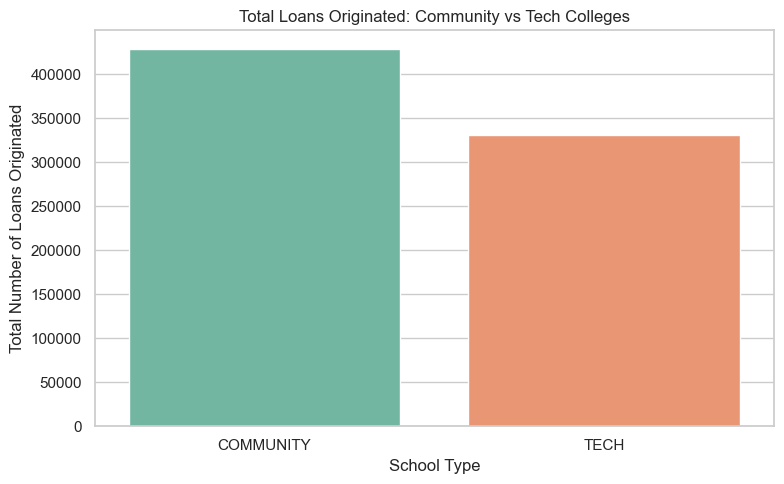

In [61]:
qa_q1['School_upper'] = qa_q1['School'].str.upper()

#2. Classify schools
def classify_school(name):
    if 'COMMUNITY' in name or 'COUNTY' in name:
        return 'COMMUNITY'
    elif 'TECH' in name:
        return 'TECH'
    else:
        return 'OTHER'

qa_q1['School Category'] = qa_q1['School_upper'].apply(classify_school)

#3. Calculate total loans originated per school
qa_q1['Total Loans Originated'] = (
    qa_q1['FFEL SUBSIDIZED_# of Loans Originated'].fillna(0) +
    qa_q1['FFEL UNSUBSIDIZED_# of Loans Originated'].fillna(0)
)

#4. Group by school type and sum
grouped_loans = qa_q1.groupby('School Category')['Total Loans Originated'].sum().reset_index()

#5. Filter only COMMUNITY and TECH
filtered_loans = grouped_loans[grouped_loans['School Category'].isin(['COMMUNITY', 'TECH'])]

#6. Plot
plt.figure(figsize=(8, 5))
sns.barplot(
    data=filtered_loans,
    x='School Category',
    y='Total Loans Originated',
    palette='Set2'
)
plt.title("Total Loans Originated: Community vs Tech Colleges")
plt.ylabel("Total Number of Loans Originated")
plt.xlabel("School Type")
plt.tight_layout()
plt.show()




### <u>Answer:</u> Community colleges generate more loans than technical colleges. This may be due to a higher number of community colleges overall.

## 2. Which states have the highest total loan disbursements?
* Sum subsidized and unsubsidized disbursements
* Group by highest total disbersements (descending order)
* Plot the figure

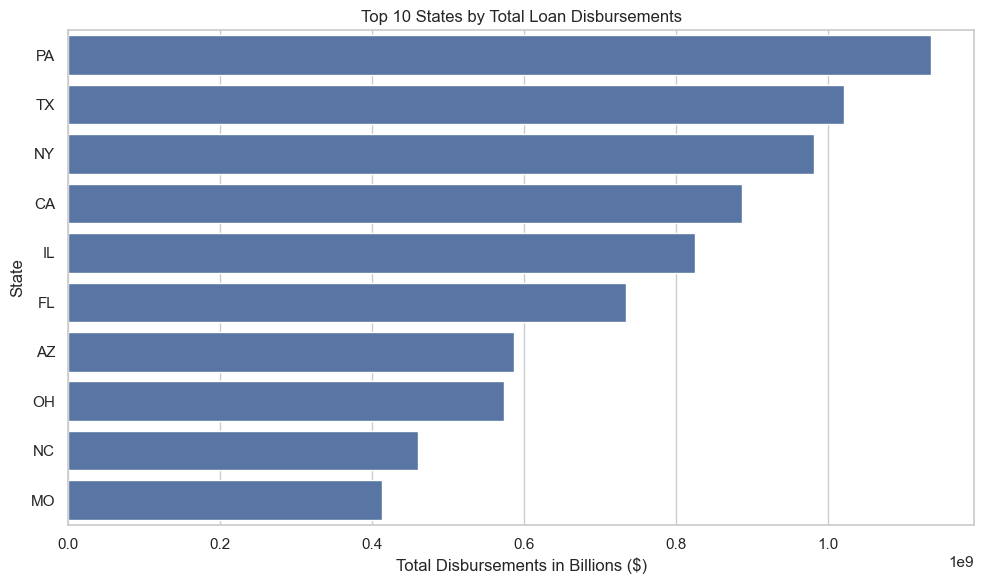

In [73]:
#Sum subsidized and unsubsidized disbursements
qa_q1['Total Disbursements'] = qa_q1[
    ['FFEL SUBSIDIZED_$ of Disbursements', 'FFEL UNSUBSIDIZED_$ of Disbursements']
].sum(axis=1)

state_disb = qa_q1.groupby('State')['Total Disbursements'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=state_disb.values, y=state_disb.index)
plt.title("Top 10 States by Total Loan Disbursements")
plt.xlabel("Total Disbursements in Billions ($)")
plt.ylabel("State")
plt.tight_layout()
plt.show()

### <u>Answer:</u> Pennsylvania, Texas, and New York have the highest loan disbursements.

## 3. Do private or public schools disburse more in federal student loans?
1. Filter for only PUBLIC and PRIVATE schools
2. Group and sum disbursements
3. Calculate total amount disbursed (sum)
4. Plot the figure

C:\Users\pmost\AppData\Local\Temp\ipykernel_24348\160089925.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


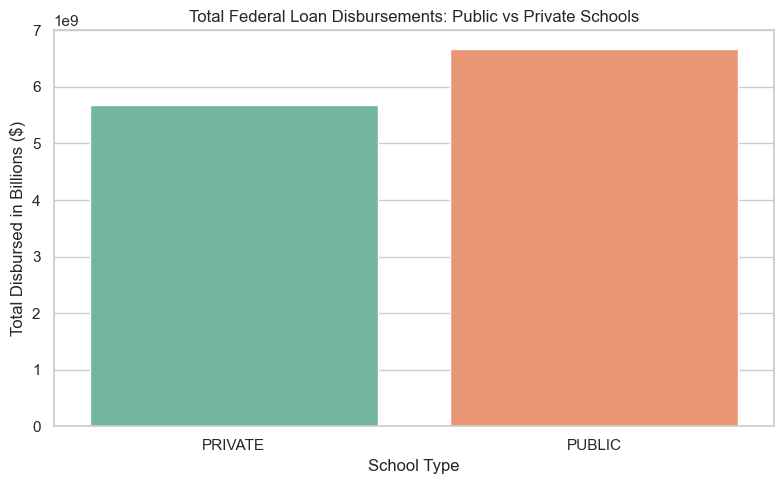

In [76]:
#1: Filter for only PUBLIC and PRIVATE schools
filtered_qa = qa_q1[qa_q1['School Type'].isin(['PUBLIC', 'PRIVATE'])]

#2: Group and sum disbursements
disb_by_type = filtered_qa.groupby('School Type')[
    ['FFEL SUBSIDIZED_$ of Disbursements', 'FFEL UNSUBSIDIZED_$ of Disbursements']
].sum()

#3: Calculate total disbursed
disb_by_type['Total Disbursed'] = disb_by_type.sum(axis=1)

#4: Plot
plt.figure(figsize=(8, 5))
sns.barplot(
    x=disb_by_type.index,
    y=disb_by_type['Total Disbursed'].values,
    palette='Set2'
)
plt.title("Total Federal Loan Disbursements: Public vs Private Schools")
plt.ylabel("Total Disbursed in Billions ($)")
plt.xlabel("School Type")
plt.tight_layout()
plt.show()


### <u>Answer:</u> Public schools disburse more in federal student loans. This may be due to a higher amount of students attending public schools rather than private schools.

## 4. Do institutions with “college” in the name receive more loans than those with “university”?
1. Filter for school name type (force uppercase)
2. Group by type of loan
3. Sum total loans
4. Only keep colleges and universities
5. Plot the figure

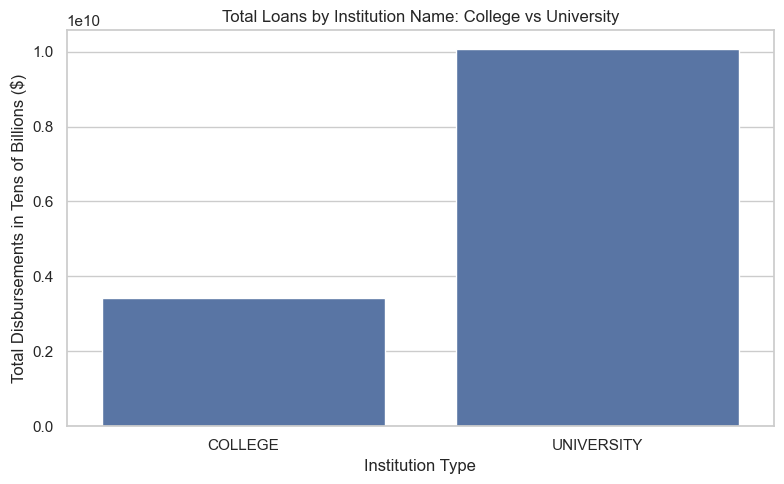

In [78]:
#Filter for school name type
qa_q1['Name Type'] = qa_q1['School'].str.upper().apply(
    lambda x: 'COLLEGE' if 'COLLEGE' in x 
    else 'UNIVERSITY' if 'UNIVERSITY' in x 
    else 'OTHER'
)

#Total disbursements by name type
loans_by_name = qa_q1.groupby('Name Type')[
    ['FFEL SUBSIDIZED_$ of Disbursements', 'FFEL UNSUBSIDIZED_$ of Disbursements']
].sum()
loans_by_name['Total'] = loans_by_name.sum(axis=1)

#Keep only COLLEGE and UNIVERSITY
loans_by_name = loans_by_name.loc[['COLLEGE', 'UNIVERSITY']]

#Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=loans_by_name.index, y=loans_by_name['Total'].values)
plt.title("Total Loans by Institution Name: College vs University")
plt.ylabel("Total Disbursements in Tens of Billions ($)")
plt.xlabel("Institution Type")
plt.tight_layout()
plt.show()


### <u>Answer:</u> Colleges with UNIVERSITY in the name disburse more loans. However, this could be due to a variety of possible factors, such as...
* More colleges having the word "university" in their name overall
* Universities having higher tuition, and thus more students apply for student loans in order to pay for the tuition

## 5. Are unsubsidized loans more common at private colleges than public ones?
1. Filter only for PUBLIC and PRIVATE (use .isin)
2. Group by school type and add up unsubsidized loans
3. Plot the figure

C:\Users\pmost\AppData\Local\Temp\ipykernel_24348\1588097854.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unsub_counts.index, y=unsub_counts.values, palette='CMRmap')


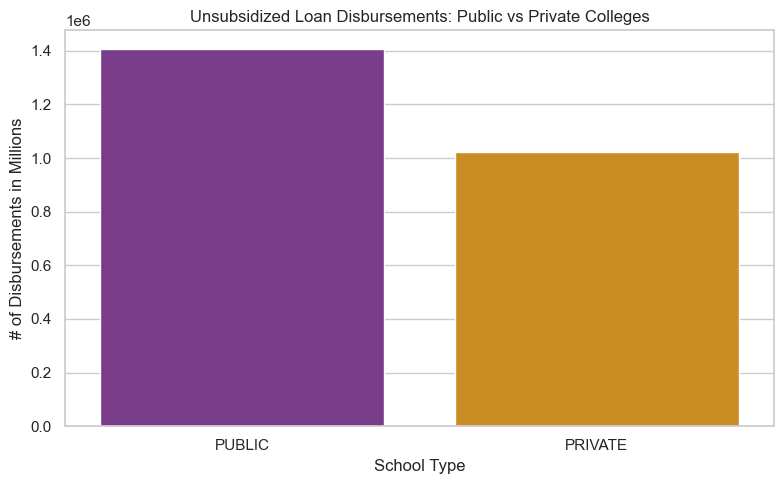

In [83]:
#1: Filter only for PUBLIC and PRIVATE
filtered_qa = qa_q1[qa_q1['School Type'].isin(['PUBLIC', 'PRIVATE'])]

#2: Group and sum unsubsidized disbursements
unsub_counts = filtered_qa.groupby('School Type')[
    'FFEL UNSUBSIDIZED_# of Disbursements'
].sum().sort_values(ascending=False)

#3: Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=unsub_counts.index, y=unsub_counts.values, palette='CMRmap')
plt.title("Unsubsidized Loan Disbursements: Public vs Private Colleges")
plt.ylabel("# of Disbursements in Millions")
plt.xlabel("School Type")
plt.tight_layout()
plt.show()


### <u>Answer:</u> Public colleges disburse more unsubsidized loans. However, this may be due to more students attending public schools.
